In [1]:
# import useful packages
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
# read file from csv
def read_file(filepath):
    if filepath.endswith("csv"):
        return pd.read_csv(filepath)
    elif filepath.endswith("csv"):
        return pd.read_csv(filepath)


In [145]:
data=read_file("./data/Mall_Customers.csv")
data=np.array(data)

X=data[:,3:].astype(np.float64)


In [169]:
# train model
def Kmeans(X,k):
    row=X.shape[0]
    col=X.shape[1]
    center=initialize_centroids(X,k)
    l= closest_centroid(X,center)
    l.shape=(l.shape[0],1)
    
    
    diff=np.inf
    while(diff!=0):
        lcenter=center
        # print(lcenter)
        l=closest_centroid(X,center)
        l.shape=(l.shape[0],1)
        # print(np.unique(l))
        # print('asdfasdfasdf')
        a=pd.DataFrame(np.hstack((X,l)),columns=list(range(col))+['l'],dtype=float)
        center=np.array(a.groupby(['l']).mean())
        # print(center)
        diff=np.sum(center-lcenter)

    return l,center
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)


l,center=Kmeans(X,3)

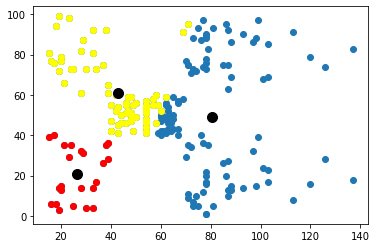

In [176]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])
col=X.shape[1]
a=pd.DataFrame(np.hstack((X,l)),columns=list(range(col))+['l'],dtype=float)
q=a[a['l']==0]
# plt.scatter()
w=a[a['l']==1]
e=a[a['l']==2]
plt.scatter(q[0],q[1],c='red')
plt.scatter(w[0],w[1],c='yellow')
plt.scatter(center[:,0],center[:,1],s=100,c='black')
# center[0]